<a href="https://colab.research.google.com/github/robgon-art/RockTopics/blob/main/3_Topic_Clustering_Rock_Lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. RockTopics - Clustering Rock Lyrics**
## Sex and Drugs and Organic Topic Modeling - Using GPT-J to analyze the lyrics of Rock &amp; Roll songs

By Robert. A Gonsalves</br>
![topic graphs](https://raw.githubusercontent.com/robgon-art/RockTopics/main/rock_topics_cover_med.png)

You can see my article here on Medium.

The source code and datasets are released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/).</br>
![CC BY-NC-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)

In [ ]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


In [ ]:
!gdown --id 1wEp9Xo06N2_yKisb6bapHFbEqsmz3sC7 # rock-topics.csv

Downloading...
From: https://drive.google.com/uc?id=1wEp9Xo06N2_yKisb6bapHFbEqsmz3sC7
To: /content/rock-topics.csv
100% 4.31M/4.31M [00:00<00:00, 63.4MB/s]


In [ ]:
import csv
rock_topics_file = open("rock-topics.csv")
rock_topics_csvreader = csv.reader(rock_topics_file)
rock_topics_header = next(rock_topics_csvreader)
print(rock_topics_header)
rock_topics_rows = []
for row in rock_topics_csvreader:
  rock_topics_rows.append(row)
print(len(rock_topics_rows))

['Band Name', 'Song', 'Topics']
11956


In [ ]:
import re
topic_dict = {}

for rtr in rock_topics_rows:
  topic_list = rtr[rock_topics_header.index("Topics")]
  topic_parts = topic_list.split(",")
  for tp in topic_parts:
    tp = tp.strip().lower()
    tp = re.sub('[^a-z0-9 ]+', '', tp)
    tp = ' '.join(tp.split())
    if tp != "":
      if tp not in topic_dict:
        topic_dict[tp] = 1
      else:
        topic_dict[tp] += 1

print("Number of topics", len(topic_dict))
print(topic_dict)

Number of topics 75252
{'true': 81, 'names': 390, 'protect': 6, 'home': 2493, 'being headed': 1, 'rock n': 156, 'achievement': 17, 'the last song': 2, 'if youre rich': 1, 'time': 6710, 'the feeling of power': 1, 'life': 10033, 'good': 221, 'shoes': 225, 'health': 525, 'depression': 1099, 'fate': 236, 'money': 4160, 'parody': 1, 'clothing': 174, 'they were white': 1, 'being new': 2, 'clean': 48, 'sexuality': 251, 'family': 1660, 'love': 59246, 'drinking': 386, 'drink': 120, 'work': 1614, 'place': 316, 'just you wait': 1, 'driving': 512, 'a car': 31, 'alcohol': 906, 'summertime blues': 3, 'looking at yourself': 2, 'being a spy': 276, 'music': 4527, 'neighbor': 4, 'neighbors': 26, 'prep': 2, 'tougher than': 2, 'im allergic': 1, 'any more': 1, 'you': 3008, 'trouble': 464, 'power': 417, 'the heart': 73, 'evil': 1284, 'tumor': 2, 'chaos': 53, 'blow blow': 1, 'sex': 3417, 'unconciousness': 2, 'leave': 42, 'hard times': 222, 'some punch': 1, 'lunch': 22, 'scumbag': 1, 'disorder': 6, 'society':

In [ ]:
topic_dict_sorted = {k: v for k, v in sorted(topic_dict.items(), key=lambda item: item[1], reverse=True)}

topics = []
weights = []
scaled_weights = []

topic_limit = 100
index = 0

for topic in topic_dict_sorted:
  w = topic_dict_sorted[topic]
  topics.append(topic)
  weights.append(w)
  scaled_weights.append(w * w / 8.0)
  index += 1
  if index >= topic_limit:
    break

print(len(topics))
print(topics)
print(weights)
print(scaled_weights)

100
['love', 'life', 'death', 'time', 'music', 'money', 'sex', 'you', 'pain', 'happiness', 'home', 'loneliness', 'god', 'heart', 'fear', 'dreams', 'war', 'friendship', 'family', 'work', 'drugs', 'emotions', 'evil', 'heartbreak', 'water', 'success', 'truth', 'baby', 'dancing', 'nothing', 'nature', 'depression', 'marriage', 'breakup', 'tears', 'mother', 'food', 'fire', 'self', 'waiting', 'alcohol', 'change', 'people', 'anger', 'sadness', 'night', 'soul', 'friends', 'sun', 'dream', 'the world', 'rain', 'travel', 'hope', 'religion', 'love loss', 'man', 'feelings', 'madness', 'fame', 'sleep', 'living', 'weakness', 'crime', 'rap', 'beauty', 'wealth', 'heaven', 'youth', 'dance', 'eyes', 'weather', 'nothingness', 'i', 'childhood', 'darkness', 'summer', 'politics', 'desire', 'freedom', 'self image', 'leaving', 'me', 'everything', 'fun', 'unknown', 'alone', 'walking', 'girls', 'peace', 'past', 'prayer', 'light', 'health', 'lyrics', 'driving', 'fashion', 'dying', 'rock', 'feeling']
[59246, 10033,

In [ ]:
number_of_lines = 0

for w in weights:
  number_of_lines += w

topic_percentages = []
for i in range(10):
  topic_percengage = 100 * weights[i] / number_of_lines
  topic_percentages.append(topic_percengage)

In [ ]:
print(number_of_lines)

185003


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


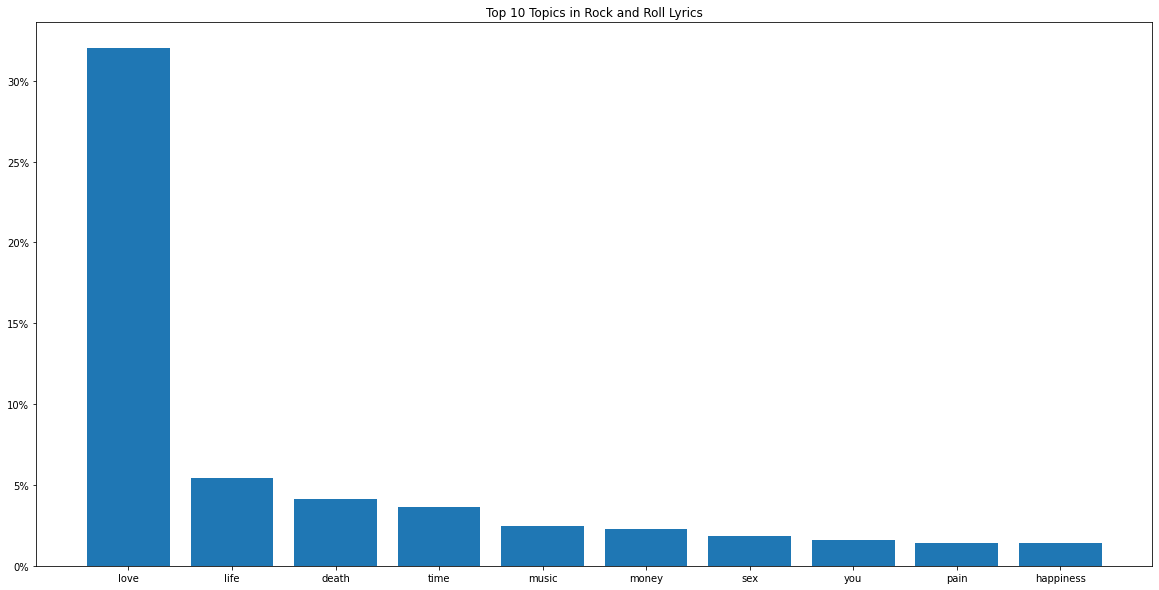

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


fig = plt.figure(figsize=(20, 10))
plt.title("Top 10 Topics in Rock and Roll Lyrics")

plt.bar(topics[:10],topic_percentages[:10])
ax = fig.add_subplot(1,1,1)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.show()

In [ ]:
def get_colors(x, y, sat_factor):
  num_points = len(x)
  max_radius = 0
  for i in range(num_points):
    radius = math.hypot(x[i], y[i])
    if radius > max_radius:
      max_radius = radius
  colors = []
  edge_colors = []
  for i in range(num_points):
      hue = math.atan2(y[i], x[i])/math.pi/2
      sat = math.hypot(x[i], y[i]) / max_radius/sat_factor
      rgb = colorsys.hsv_to_rgb(hue, 0.1+sat, 1)
      colors.append(rgb)
      rgb = colorsys.hsv_to_rgb(hue, 0.1+sat, 0.75)
      edge_colors.append(rgb)
  colors_np = np.array(colors)
  colors_np = np.clip(colors_np, 0, 1)
  edge_colors_np = np.array(edge_colors)
  edge_colors_np = np.clip(edge_colors_np, 0, 1)
  return colors_np, edge_colors_np

In [ ]:
def rotate_points(x, y, x_axis_index, y_axis_index):
  num_points = len(x)
  x_rotated = []
  y_rotated = []
  x_axis_angle = math.atan2(y[x_axis_index], x[x_axis_index])
  y_axis_angle = math.atan2(y[y_axis_index], x[y_axis_index])
  if math.sin(y_axis_angle - x_axis_angle) < 0:
    flip_y = -1.0
  else:
    flip_y = 1.0
  for i in range(num_points):
    theta = math.atan2(y[i], x[i])
    radius = math.hypot(x[i], y[i])
    theta_rotated = theta - x_axis_angle
    x_rotated.append(radius*math.cos(theta_rotated))
    y_rotated.append(radius*math.sin(theta_rotated)*flip_y)
  return(x_rotated, y_rotated)

In [ ]:
from sklearn.preprocessing import StandardScaler
topic_embeddings = embed(topics)
sc = StandardScaler()
topic_embeddings_scaled = sc.fit_transform(topic_embeddings)

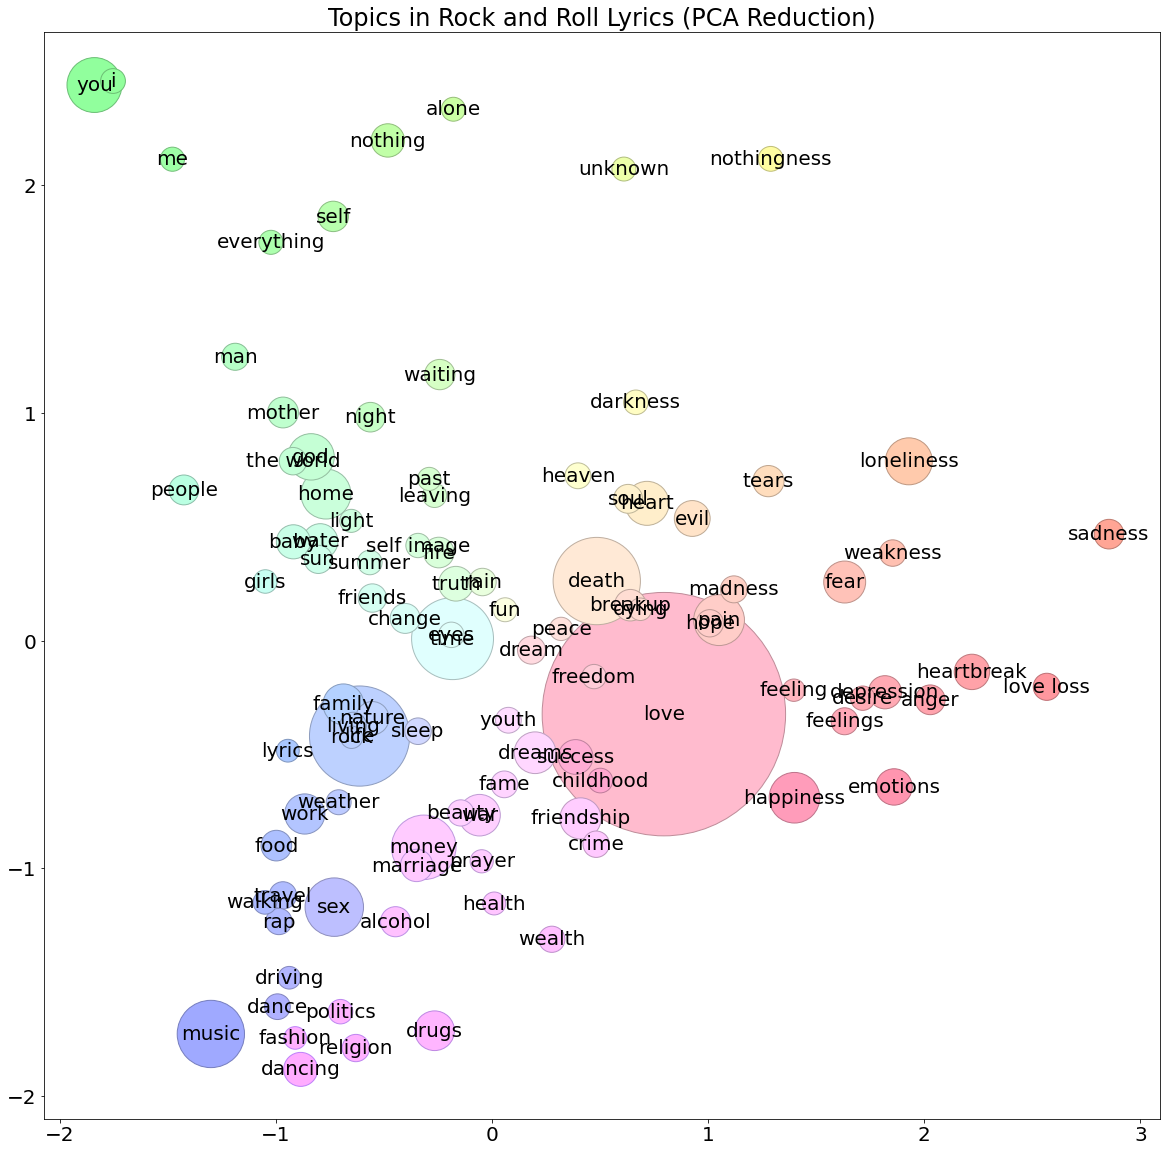

In [ ]:
import math
import colorsys
import numpy as np
num_topics = 100

pca = PCA(n_components=2, random_state=3)
topics_2d = pca.fit_transform(topic_embeddings_scaled).transpose()
pca_x, pca_y = topics_2d
pca_x = (pca_x-pca_x.mean()) / pca_x.std()
pca_y = (pca_y-pca_y.mean()) / pca_y.std()

pca_main_topic_names = [""] * len(topics)
for i, t in enumerate(topics[:num_topics]):
  pca_main_topic_names[i] = t

pca_colors, pca_edge_colors = get_colors(pca_x, pca_y, 3)

plt.figure(figsize=(20, 20))
plt.title("Topics in Rock and Roll Lyrics (PCA Reduction)")
plt.rcParams['font.size'] = 20
plt.scatter(pca_x, pca_y, s=weights, linewidth=1, color=pca_colors, edgecolor=pca_edge_colors)
for i, txt in enumerate(pca_main_topic_names):
  plt.annotate(txt, (pca_x[i], pca_y[i]), ha='center', va='center')
plt.show()

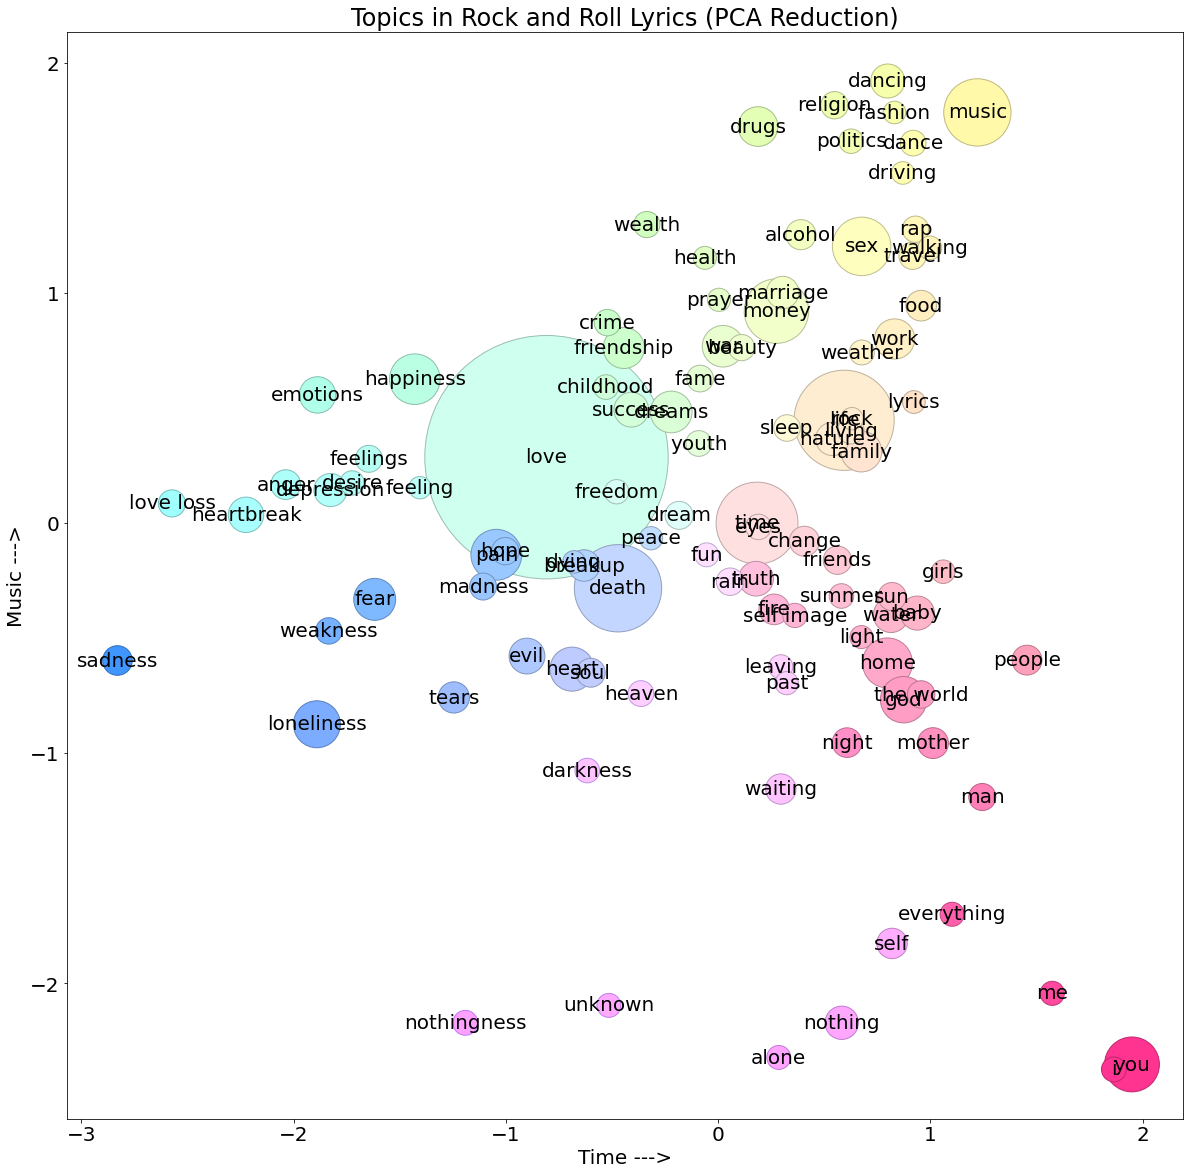

In [ ]:
x_axis_label = "Time"
y_axis_label = "Music"
x_axis_index = topics.index(x_axis_label.lower())
y_axis_index = topics.index(y_axis_label.lower())

pca_x_rotated, pca_y_rotated = rotate_points(pca_x, pca_y, x_axis_index, y_axis_index)
pca_colors, pca_edge_colors = get_colors(pca_x_rotated, pca_y_rotated, 3)

plt.figure(figsize=(20, 20))
plt.title("Topics in Rock and Roll Lyrics (PCA Reduction)")
plt.rcParams['font.size'] = 20
plt.scatter(pca_x_rotated, pca_y_rotated, s=weights, linewidth=1, color=pca_colors, edgecolor=pca_edge_colors)
for i, txt in enumerate(pca_main_topic_names):
  plt.annotate(txt, (pca_x_rotated[i], pca_y_rotated[i]), ha='center', va='center')
plt.xlabel(x_axis_label + " --->")
plt.ylabel(y_axis_label + " --->")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


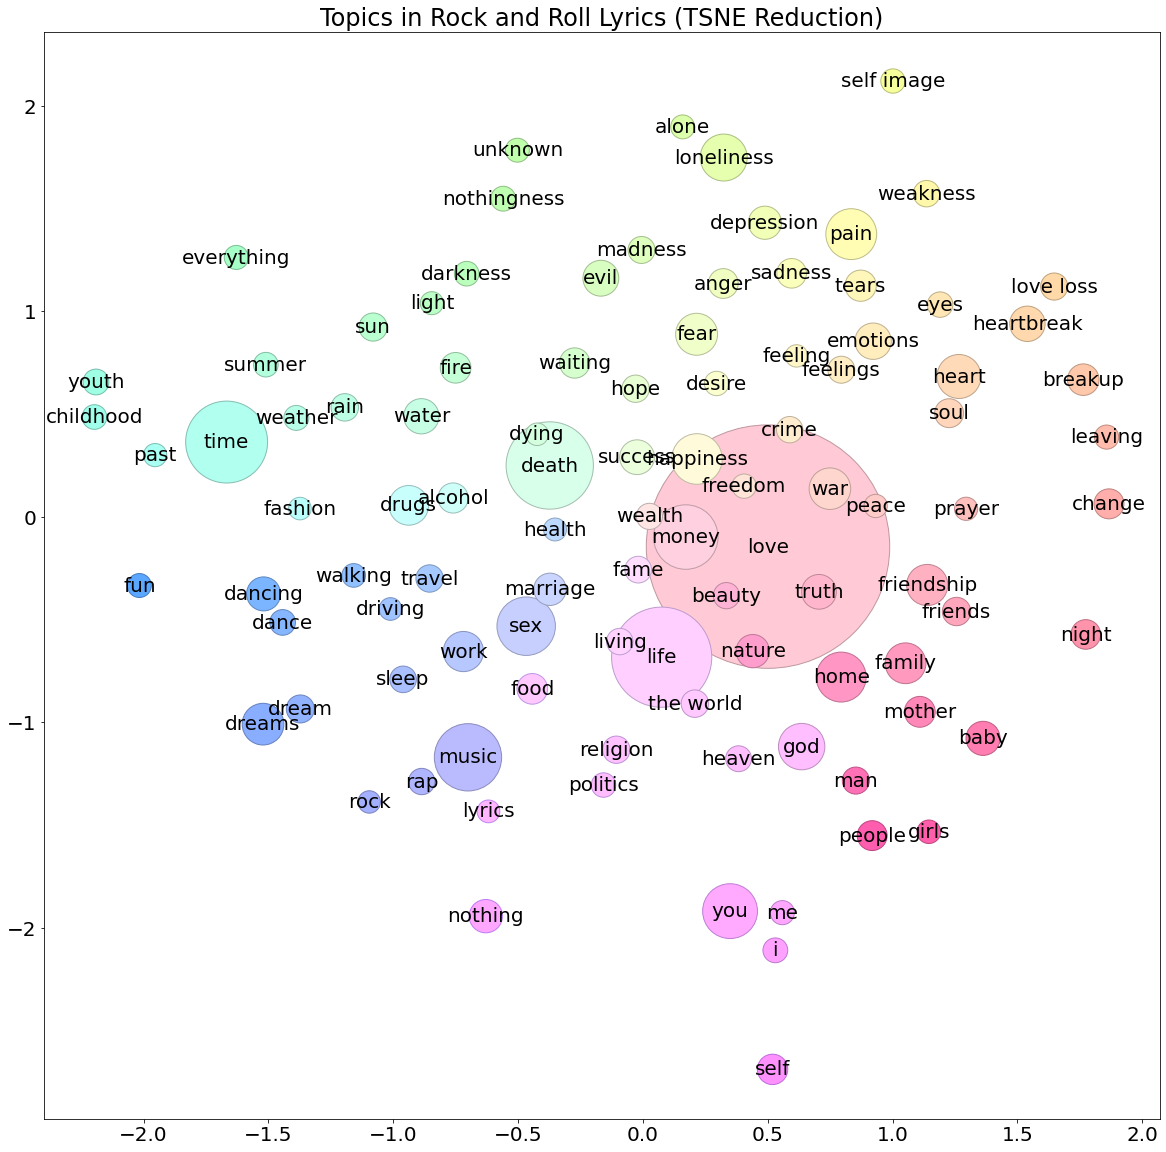

In [ ]:
tsne = TSNE(n_components=2, random_state=2)
topics_2d = tsne.fit_transform(topic_embeddings_scaled).transpose()
tsne_x, tsne_y = topics_2d
tsne_x = (tsne_x-tsne_x.mean()) / tsne_x.std()
tsne_y = (tsne_y-tsne_y.mean()) / tsne_y.std()

tsne_main_topic_names = [""] * len(topics)
for i, t in enumerate(topics[:100]):
  tsne_main_topic_names[i] = t

tsne_colors, tsne_edge_colors = get_colors(tsne_x, tsne_y, 3)

plt.figure(figsize=(20, 20))
plt.title("Topics in Rock and Roll Lyrics (TSNE Reduction)")
plt.rcParams['font.size'] = 20
plt.scatter(tsne_x, tsne_y, s=weights, linewidth=1, color=tsne_colors, edgecolor=tsne_edge_colors)
for i, txt in enumerate(tsne_main_topic_names):
  plt.annotate(txt, (tsne_x[i], tsne_y[i]), ha='center', va='center')
plt.show()

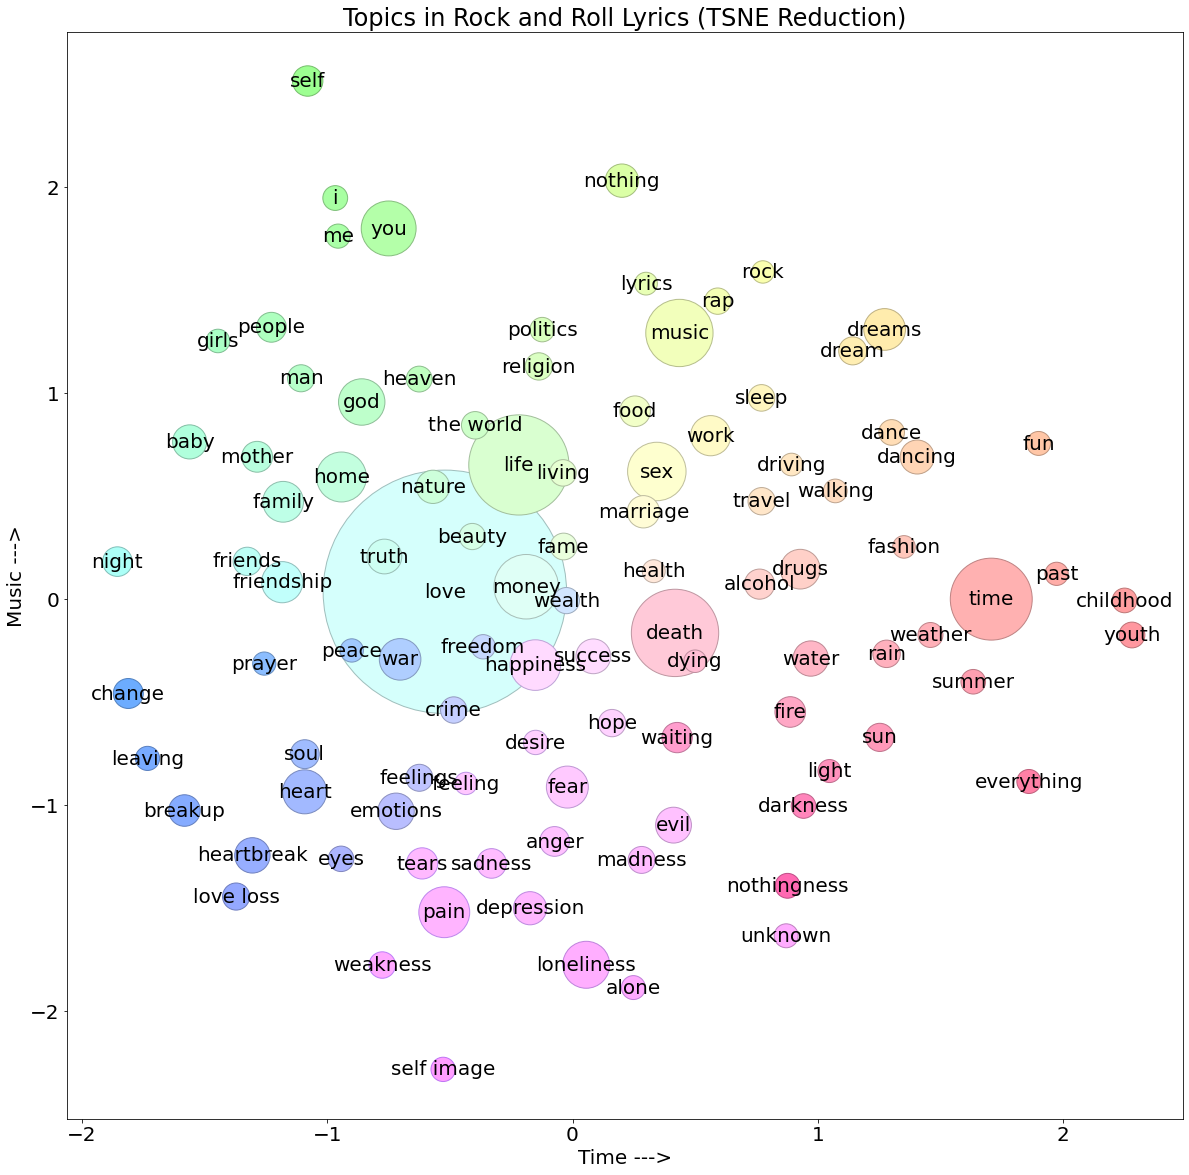

In [ ]:
tsne_x_rotated, tsne_y_rotated = rotate_points(tsne_x, tsne_y, x_axis_index, y_axis_index)
tsne_colors, tsne_edge_colors = get_colors(tsne_x_rotated, tsne_y_rotated, 3)

plt.figure(figsize=(20, 20))
plt.title("Topics in Rock and Roll Lyrics (TSNE Reduction)")
plt.rcParams['font.size'] = 20
plt.scatter(tsne_x_rotated, tsne_y_rotated, s=weights, linewidth=1, 
            color=tsne_colors, edgecolor=tsne_edge_colors)
for i, txt in enumerate(tsne_main_topic_names):
  plt.annotate(txt, (tsne_x_rotated[i], tsne_y_rotated[i]), ha='center', va='center')
plt.xlabel(x_axis_label + " --->")
plt.ylabel(y_axis_label + " --->")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


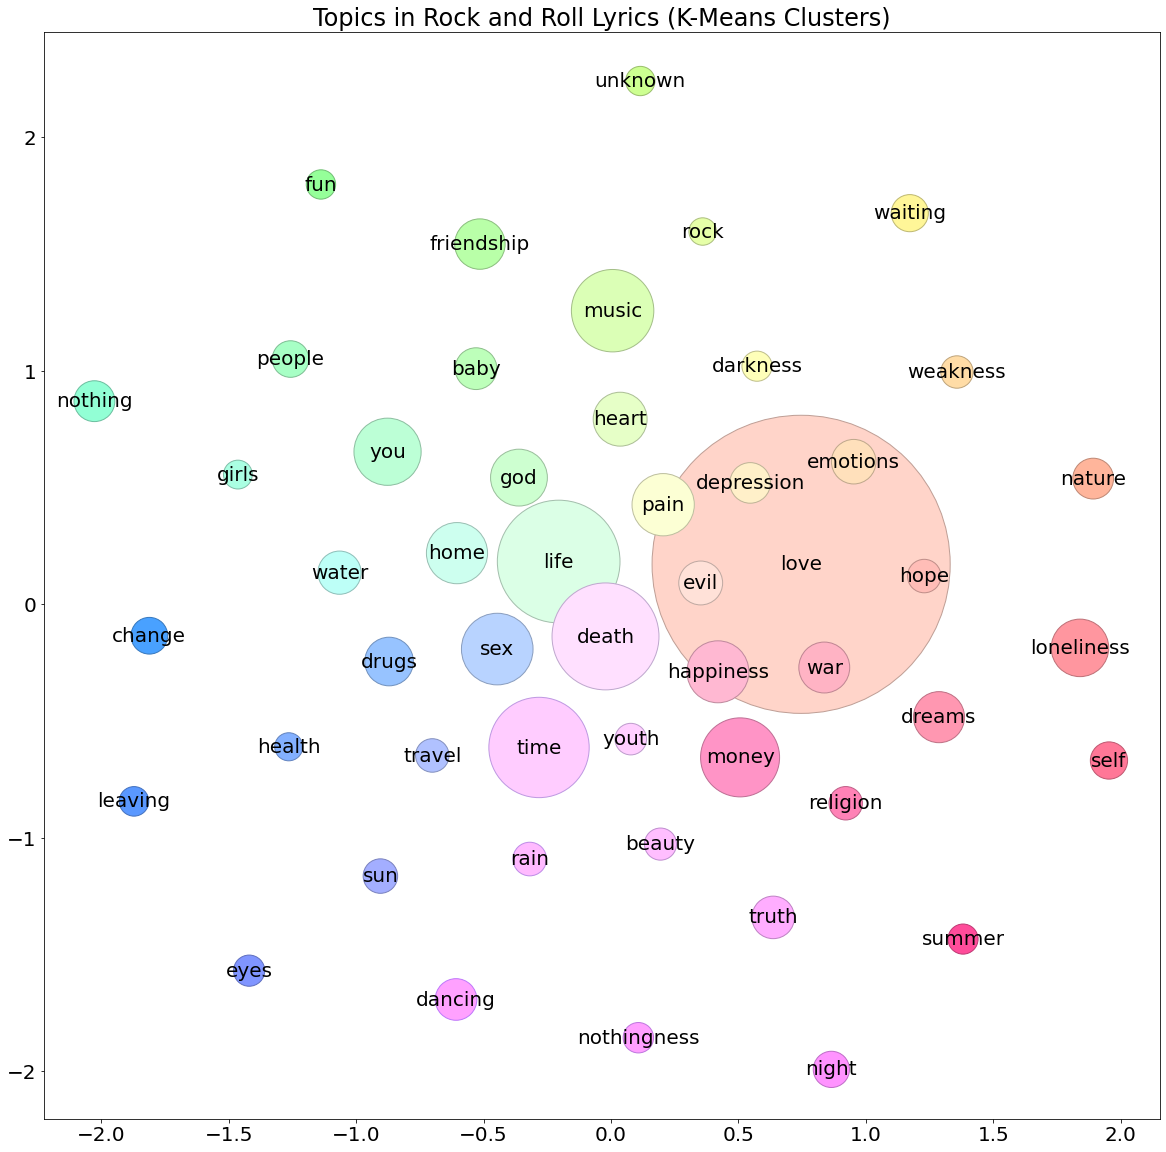

In [ ]:
num_clusters = 50

kmeans = KMeans(n_clusters=num_clusters, algorithm="full", n_init=100, max_iter=300, random_state=0)
clusters = kmeans.fit(topic_embeddings_scaled, weights)

cluster_weights = [0] * num_clusters
cluster_names = [""] * num_clusters
topic_predictions = clusters.predict(topic_embeddings_scaled)

# get the weights
for i, t in enumerate(topic_predictions):
  if len(cluster_names[t]) == 0:
    cluster_name = topics[i]
    if i < 50000:
      cluster_names[t] = cluster_name
    w = weights[i]
    cluster_weights[t] += 1.5*w

cluster_centers_scaled = sc.fit_transform(clusters.cluster_centers_)
x, y = tsne.fit_transform(cluster_centers_scaled).transpose()
x = (x-x.mean()) / x.std()
y = (y-y.mean()) / y.std()

permutation = []
for i in range(num_clusters):
  permutation.append([cluster_weights[i], i])
permutation.sort(reverse=True)

x_sorted = []
y_sorted = []
cluster_names_sorted = []
cluster_weights_sorted = []

for i in range(num_clusters):
  x_sorted.append(x[permutation[i][1]])
  y_sorted.append(y[permutation[i][1]])
  cluster_names_sorted.append(cluster_names[permutation[i][1]])
  cluster_weights_sorted.append(cluster_weights[permutation[i][1]])

colors, edge_colors = get_colors(x_sorted, y_sorted, 3)

plt.figure(figsize=(20, 20))
plt.title("Topics in Rock and Roll Lyrics (K-Means Clusters)")
plt.rcParams['font.size'] = 20
plt.scatter(x_sorted, y_sorted, linewidth=1, s=cluster_weights_sorted,
            color=colors, edgecolor=edge_colors)
for i, txt in enumerate(cluster_names_sorted):
  plt.annotate(txt, (x_sorted[i], y_sorted[i]), ha='center', va='center')
plt.show()

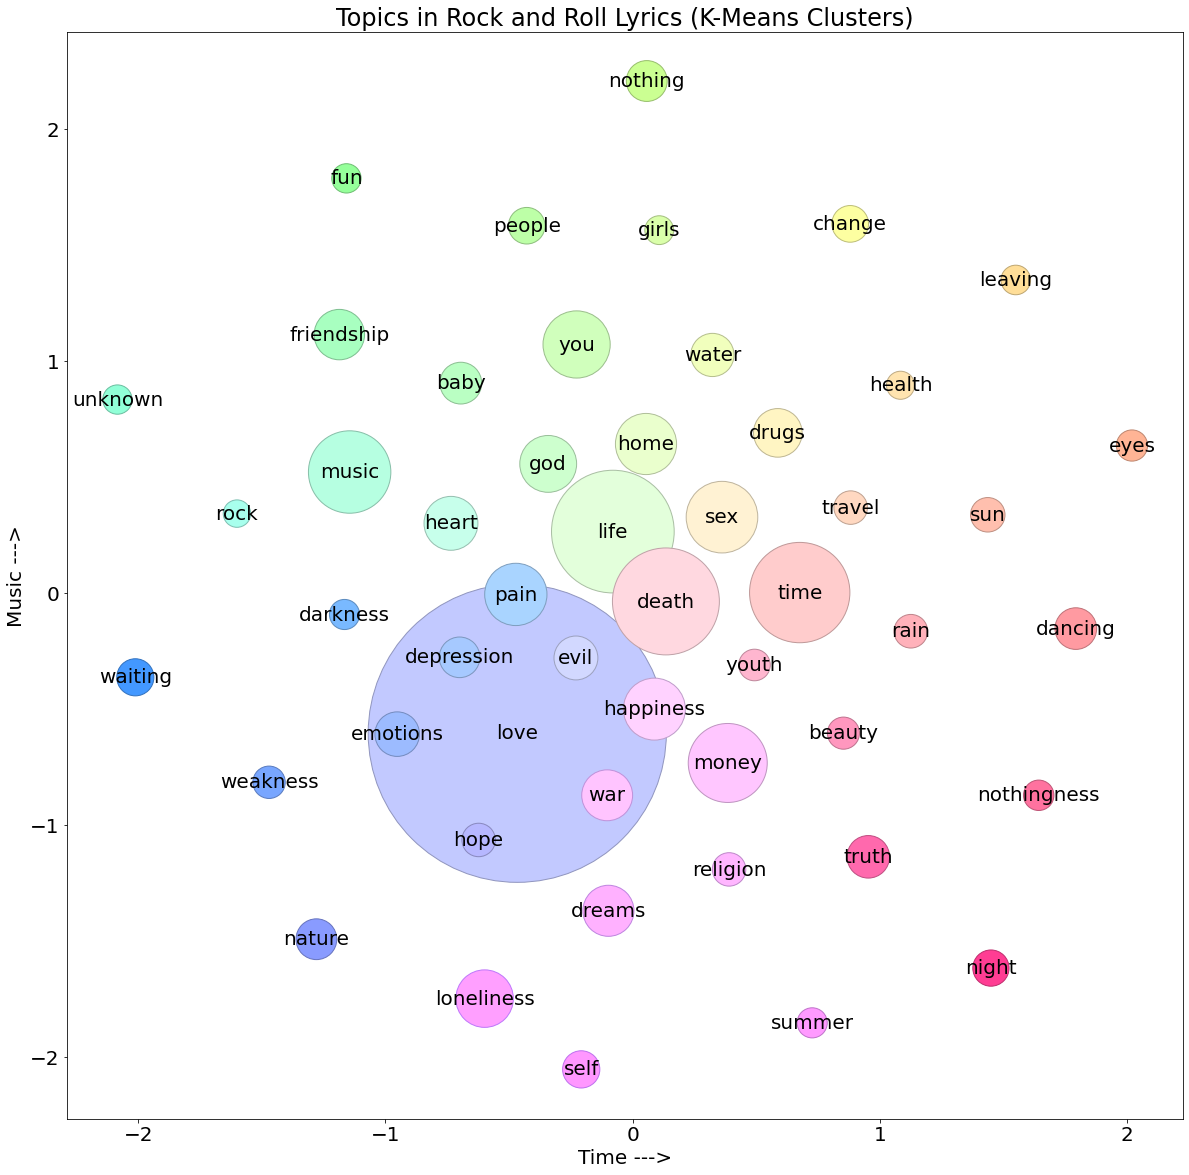

In [ ]:
x_rotated, y_rotated = rotate_points(x_sorted, y_sorted, x_axis_index, y_axis_index)
colors, edge_colors = get_colors(x_rotated, y_rotated, 3)

plt.figure(figsize=(20, 20))
plt.title("Topics in Rock and Roll Lyrics (K-Means Clusters)")
plt.rcParams['font.size'] = 20
plt.scatter(x_rotated, y_rotated, linewidth=1, s=cluster_weights_sorted, color=colors, edgecolor=edge_colors)
for i, txt in enumerate(cluster_names_sorted):
  plt.annotate(txt, (x_rotated[i], y_rotated[i]), ha='center', va='center')
plt.xlabel(x_axis_label + " --->")
plt.ylabel(y_axis_label + " --->")
plt.show()

In [ ]:
band_names = []
band_average_x = []
band_average_y = []
band_count = []
current_band = rock_topics_rows[0][rock_topics_header.index("Band Name")]

for i, rtr in enumerate(rock_topics_rows):
  if i == 0:
    x_sum = 0
    y_sum = 0
    count = 0
  band_name = rtr[rock_topics_header.index("Band Name")]
  if band_name != current_band:
    print(band_name)
    current_band = band_name
    average_x = x_sum/count
    average_y = y_sum/count
    band_names.append(current_band)
    band_average_x.append(average_x)
    band_average_y.append(average_y)
    band_count.append(count)
    x_sum = 0
    y_sum = 0
    count = 0
  else:
    topic_list = rtr[rock_topics_header.index("Topics")]
    topic_parts = topic_list.split(",")
    for tp in topic_parts:
      tp = tp.strip().lower()
      tp = re.sub('[^a-z0-9 ]+', '', tp)
      tp = ' '.join(tp.split())
      if tp in cluster_names_sorted:
        index = cluster_names_sorted.index(tp)
        x_sum += tsne_x_rotated[index]
        y_sum += tsne_y_rotated[index]
        count += 1

Aerosmith
Beastie Boys
Black Sabbath
Bob Dylan
Bruce Springsteen
Buddy Holly
Chuck Berry
Cream
Creedence Clearwater Revival
David Bowie
Elvis Costello
Elvis Presley
Eminem
Eric Clapton
Gram Parsons
Guns N' Roses
Janis Joplin
Jay-Z
Jerry Lee Lewis
Jimi Hendrix
John Lennon
Joni Mitchell
Led Zeppelin
Little Richard
Lynyrd Skynyrd
Madonna
Metallica
Michael Jackson
Neil Young
Nirvana
Patti Smith
Pink Floyd
Queen
R.E.M.
Radiohead
Rolling Stones
The Band
The Beach Boys
The Beatles
The Byrds
The Doors
The Police
The Who
Tina Turner
Tom Petty
Tupac Shakur
U2
Van Morrison
Velvet Underground


In [ ]:
print(band_names)
print(band_average_x)
print(band_average_y)
print(band_count)

['Aerosmith', 'Beastie Boys', 'Black Sabbath', 'Bob Dylan', 'Bruce Springsteen', 'Buddy Holly', 'Chuck Berry', 'Cream', 'Creedence Clearwater Revival', 'David Bowie', 'Elvis Costello', 'Elvis Presley', 'Eminem', 'Eric Clapton', 'Gram Parsons', "Guns N' Roses", 'Janis Joplin', 'Jay-Z', 'Jerry Lee Lewis', 'Jimi Hendrix', 'John Lennon', 'Joni Mitchell', 'Led Zeppelin', 'Little Richard', 'Lynyrd Skynyrd', 'Madonna', 'Metallica', 'Michael Jackson', 'Neil Young', 'Nirvana', 'Patti Smith', 'Pink Floyd', 'Queen', 'R.E.M.', 'Radiohead', 'Rolling Stones', 'The Band', 'The Beach Boys', 'The Beatles', 'The Byrds', 'The Doors', 'The Police', 'The Who', 'Tina Turner', 'Tom Petty', 'Tupac Shakur', 'U2', 'Van Morrison', 'Velvet Underground']
[-0.1702485353024252, -0.24052427012374247, -0.19589598004731254, -0.14904710476420538, -0.19530633882183798, -0.23651480548569948, -0.35930099244088604, -0.27657182099826333, -0.22652296797253185, -0.21168454413132806, -0.21464780812747644, -0.2460975692558361, -

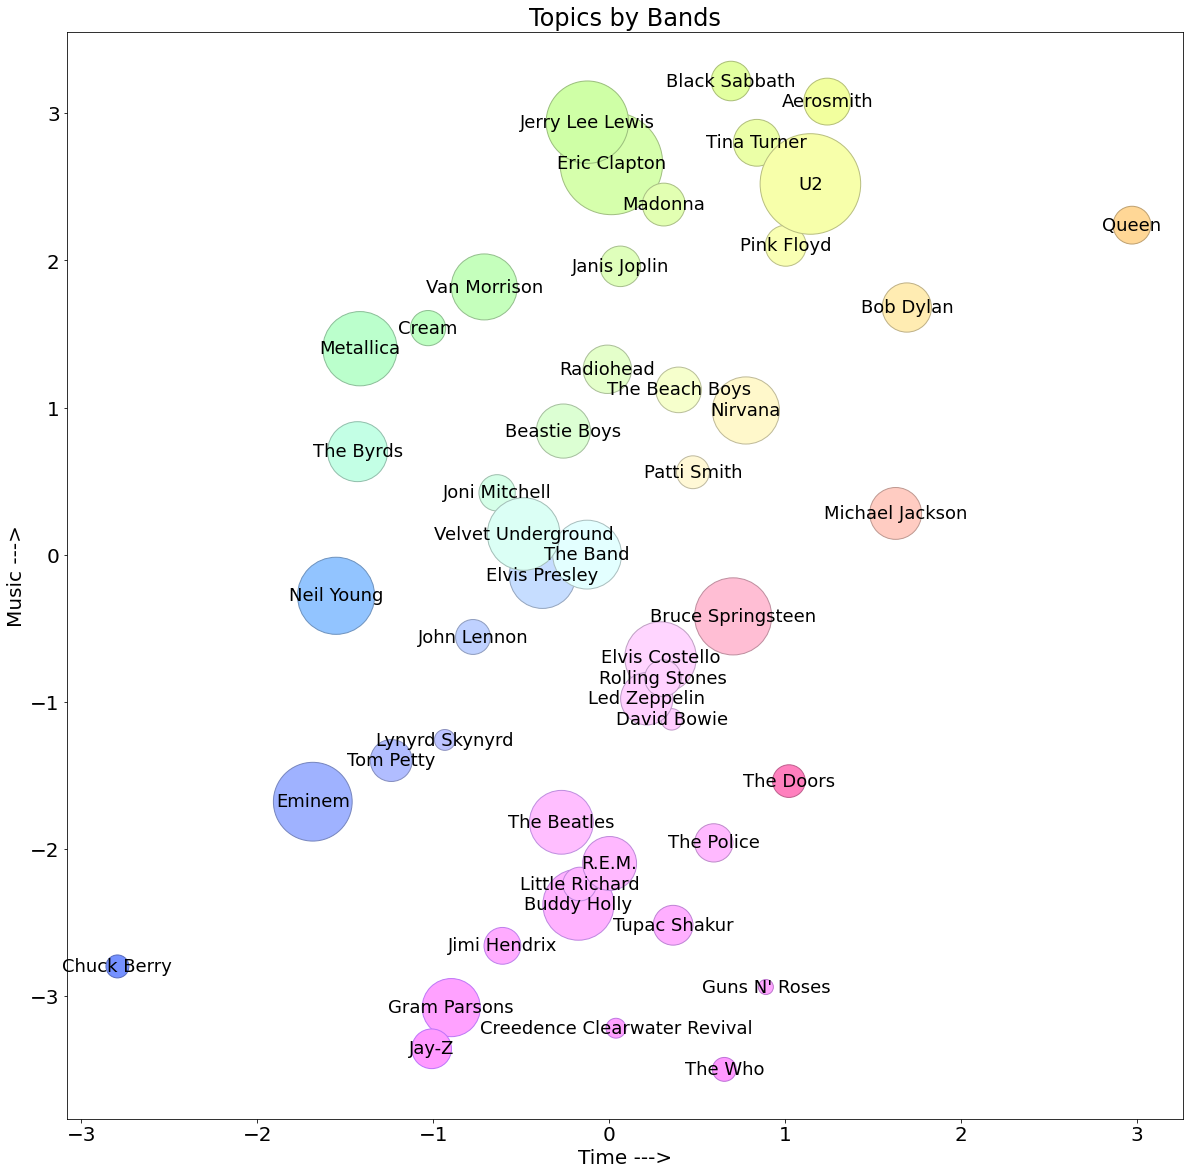

In [ ]:
band_x = np.array(band_average_x)
band_y = np.array(band_average_y)

band_x = (band_x-band_x.mean()) / band_x.std()
# band_y = (band_y-band_y.mean()) / band_y.std()

y_values = []
for i, y in enumerate(band_y):
  y_values.append([y, i])
y_values.sort()
band_y_new = np.zeros(len(y_values))
for i, y in enumerate(band_y):
  band_y_new[y_values[i][1]] = (i-25) * 7.0 / 50


colors, edge_colors = get_colors(band_x, band_y_new, 3)

plt.figure(figsize=(20, 20))
plt.title("Topics by Bands")
plt.rcParams['font.size'] = 18
plt.scatter(band_x, band_y_new, linewidth=1, s=band_count, color=colors, edgecolor=edge_colors)
for i, txt in enumerate(band_names):
  plt.annotate(txt, (band_x[i], band_y_new[i]), ha='center', va='center')
plt.xlabel(x_axis_label + " --->")
plt.ylabel(y_axis_label + " --->")
plt.show()

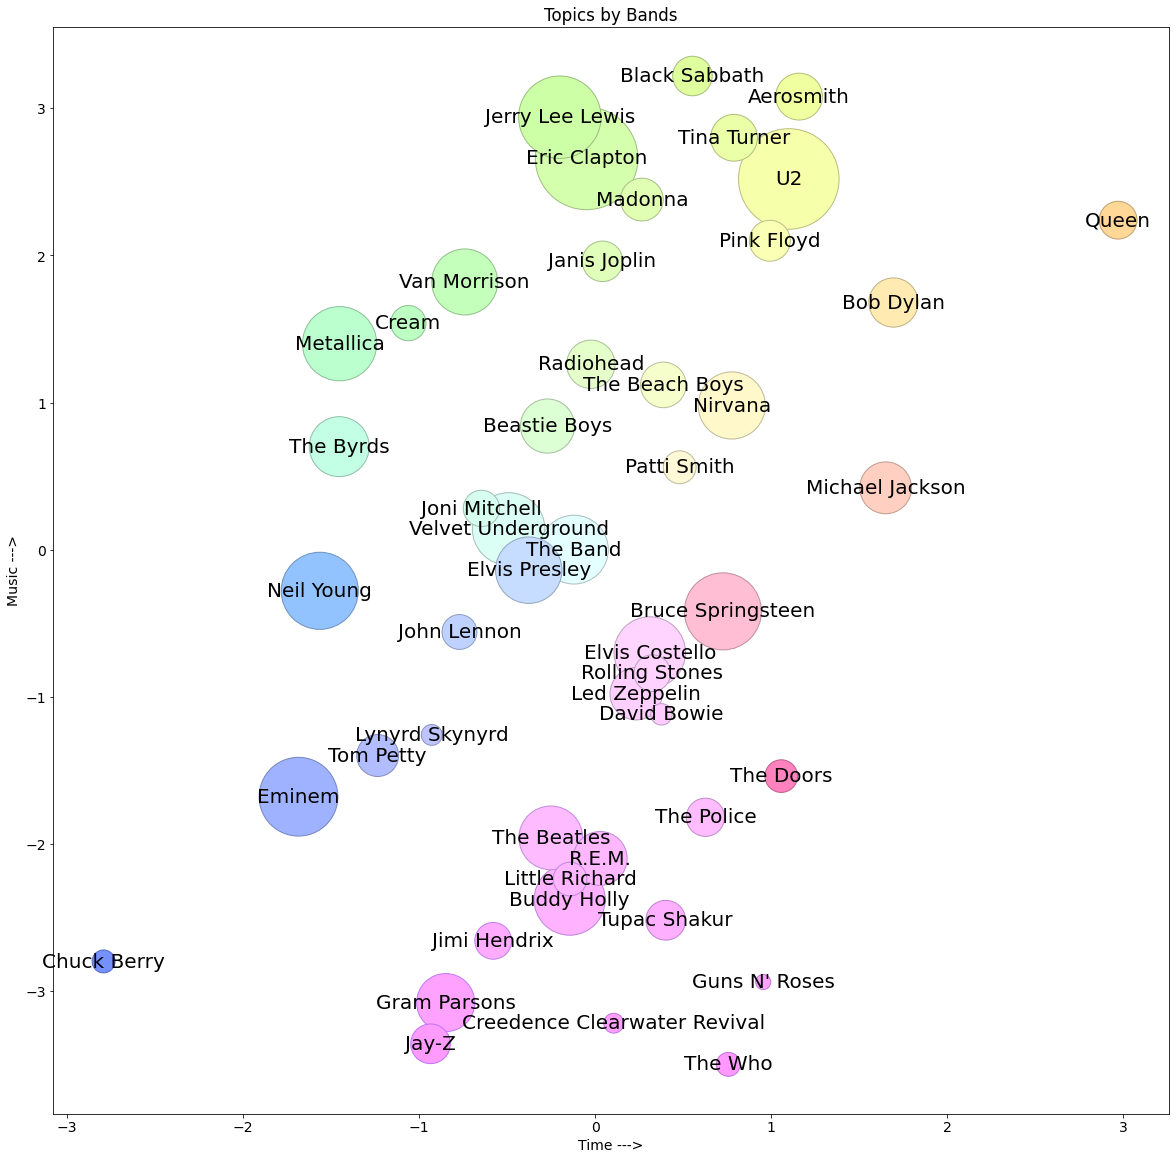

In [ ]:
permutation = []
for i in range(len(band_names)):
  permutation.append([band_count[i], i])
permutation.sort(reverse=True)

x_sorted = []
y_sorted = []
band_names_sorted = []
band_weights_sorted = []

for i in range(len(band_names)):
  x_sorted.append(band_x[permutation[i][1]])
  y_sorted.append(band_y_new[permutation[i][1]])
  band_names_sorted.append(band_names[permutation[i][1]])
  band_weights_sorted.append(band_count[permutation[i][1]])

colors, edge_colors = get_colors(x_sorted, y_sorted, 3)

plt.figure(figsize=(20, 20))
plt.title("Topics by Bands")
plt.rcParams['font.size'] = 20
plt.scatter(x_sorted, y_sorted, linewidth=1, s=band_weights_sorted, color=colors, edgecolor=edge_colors)
for i, txt in enumerate(band_names_sorted):
  plt.annotate(txt, (x_sorted[i], y_sorted[i]), ha='center', va='center')
plt.xlabel(x_axis_label + " --->")
plt.ylabel(y_axis_label + " --->")
plt.show()